# Part 4: Depth from Video -- Basic:
**Write a program to estimate depth map from video using the method described in this paper: Depth Map from Video Sequence.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco 
import cv2
import os

# load the cameras matrix in cameras.txt
framenum = np.loadtxt('Road/cameras.txt',dtype=np.float32, max_rows=1)
cam = np.loadtxt('Road/cameras.txt',dtype=np.float32, skiprows=1)
framenum = int(framenum)
K = []
R = []
T = []
for i in range(0, framenum):
    K.append(cam[7*i:7*i+3, :])
    R.append(cam[7*i+3:7*i+6, :])
    T.append(cam[7*i+6, :])

K = np.array(K)
R = np.array(R)
T = np.array(T)

# load images
path = 'Road/src'
datanames = os.listdir(path)
img_ls = [] 
img_v_ls = []
for i in datanames:
    tmp = cv2.imread('Road/src/'+str(i))
    tmp = cv2.cvtColor(tmp,cv2.COLOR_BGR2RGB)
    tmp_v = tmp.reshape(tmp.shape[0]*tmp.shape[1], tmp.shape[2])
    img_ls.append(tmp)
    img_v_ls.append(tmp_v)
img = np.array(img_ls) #(141, 540, 960, 3)
img_v = np.array(img_v_ls)

print('K shape:', K.shape)
print('R shape:', R.shape)
print('T shape:', T.shape)
print('img shape:', img.shape)
print('img_v shape:', img_v.shape) 

img_1 = img[0]
H, W, _ = img_1.shape
N = H * W 

frame_num=20
image_num=3

dis_min = 0
step = 1e-4
dis_max = 0.01
# Introduce epsilon to prevent division by zero or very small values when calculating the link weights. 
epsilon = 50
# Introduce sigma to control influence of the data term in the overall energy minimization.
sigma = 10
lmbda = 3
dis_range = int(1 + (dis_max - dis_min) / step)
disparity = np.arange(dis_min, dis_max+(1*step), step)  

/Users/admin/EE5371/CA2/.venv/lib/python3.12/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


K shape: (141, 3, 3)
R shape: (141, 3, 3)
T shape: (141, 3)
img shape: (141, 540, 960, 3)
img_v shape: (141, 518400, 3)


frame_range: [101, 102, 103]
Disparity Initialization for image 101
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 10

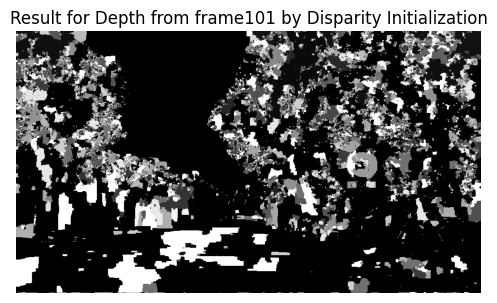

Disparity Initialization for image 102
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(51840

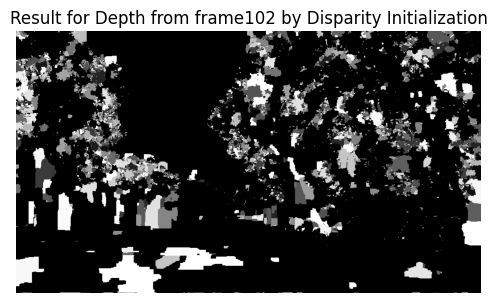

Disparity Initialization for image 103
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(518400, 101)
pc:(51840

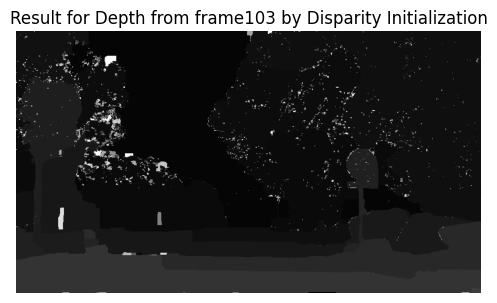

In [2]:
D = np.zeros([frame_num,H, W])

first = 100
img_1 = img_ls[first]

# label cost
pairwise = (1 - np.eye(dis_range))

#horizontal and vertical neighbor cost
Hr = np.sum((img_1[:, 0:-1].astype(np.float) - img_1[:, 1:].astype(np.float))**2, axis=2)
Hr = 1.0/np.sqrt(Hr+epsilon)
Ver = np.sum((img_1[0:-1, :].astype(np.float) -img_1[1:, :].astype(np.float))**2, axis=2)
Ver = 1.0/np.sqrt(Ver+epsilon)

# meshgrid generation for whole image processing
X, Y = np.meshgrid(np.arange(W), np.arange(H))
loc_1 = np.vstack((X.ravel(), Y.ravel(), np.ones(N)))
pix_1 = np.array([img_1[Y.ravel(), X.ravel(), :]])

# data term
# frame_lower = 0
frame_lower = max(0, first - frame_num // 2)
frame_upper = 103
frame_range = list(range(first + 1, frame_upper + 1))
# frame_range = list(range(frame_lower, first)) + list(range(first + 1, frame_upper + 1))
print('frame_range:', frame_range)

unary = np.zeros((N, dis_range))
K_1 = K[first]
R_1 = R[first]
T_1 = np.mat(T[first]).T
   
for i, second in enumerate(frame_range):
    print(f'Disparity Initialization for image {second}')
    img_2 = img_ls[second]
    K_2 = K[second]
    R_2 = R[second]
    T_2 = np.mat(T[second]).T
    pc = np.zeros((N, dis_range))
    for dis in range(dis_range):
        loc_2 = np.dot(np.dot(np.dot(np.dot(K_2, R_2.T), R_1), np.linalg.inv(K_1)), loc_1) + np.dot(np.dot(K_2, R_2.T), (T_1 - T_2))* disparity[dis]
        loc_2 = np.round(loc_2 / loc_2[2, :])
        loc_2 = np.array(loc_2, dtype=np.int32)
        # boundary check
        loc_2[0, loc_2[0, :] < 0] = 0
        loc_2[1, loc_2[1, :] < 0] = 0
        loc_2[0, loc_2[0, :] >= W] = W - 1
        loc_2[1, loc_2[1, :] >= H] = H - 1

        pix_2 = np.array([img_2[loc_2[1, :], loc_2[0, :]]])
        # sigma is the threshold for the data term
        pc[:, dis] = ((sigma / (sigma + np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))))
        print(f"pc:{pc.shape}")
    unary += pc
    # print('pc',pc)
    # print('unary',unary)

    final_unary = 1 - (unary / np.max(unary))

    final_unary = final_unary.reshape(H, W, dis_range)

    # graphcut:lambda1 is the weight for the data term, lambda2 is the weight for the smooth term
    init = pygco.cut_grid_graph(final_unary, lmbda*pairwise,  Ver, Hr, n_iter=-1, algorithm='expansion')
    init = init.reshape(H, W)
    D[i,:,:] = init
    print('get_depth_map................................')
    plt.figure(num=1, dpi=100, figsize=(6,6))
    plt.imshow(init,cmap='gray')
    plt.title(f'Result for Depth from frame{second} by Disparity Initialization')
    plt.axis("off")
    plt.show()


In [3]:
print(D[0])
print(f'Boundle Optimization: choose_fram =={first} sequence ={frame_range}')
# first = 100
img_1 = img_ls[first]

# label cost
pairwise = (1 - np.eye(dis_range))

#horizontal and vertical neighbor cost
Hr = np.sum((img_1[:, 0:-1].astype(np.float) - img_1[:, 1:].astype(np.float))**2, axis=2)
Hr = 1.0/np.sqrt(Hr+epsilon)
Ver = np.sum((img_1[0:-1, :].astype(np.float) -img_1[1:, :].astype(np.float))**2, axis=2)
Ver = 1.0/np.sqrt(Ver+epsilon)

# meshgrid generation for whole image processing
X, Y = np.meshgrid(np.arange(W), np.arange(H))
loc_1 = np.vstack((X.ravel(), Y.ravel(), np.ones(N)))
print(f"loc_1:{loc_1.shape}")
pix_1 = np.array([img_1[Y.ravel(), X.ravel(), :]])
unary = np.zeros((N, dis_range))
   
for i, second in enumerate(frame_range):
    print(f"solving img{second}")
    img_2 = img_ls[second]
    K_2 = K[second]
    R_2 = R[second]
    T_2 = np.mat(T[second]).T
    pc = np.zeros((N, dis_range))
    pv = np.zeros((N, dis_range))
    for dis in range(dis_range):
        
        loc_2 = np.dot(np.dot(np.dot(np.dot(K_2, R_2.T), R_1), np.linalg.inv(K_1)), loc_1) + np.dot(np.dot(K_2, R_2.T), (T_1 - T_2))* disparity[dis]
        loc_2 = np.round(loc_2 / loc_2[2, :])
        # print('loc2',loc_2.shape)
        loc_2 = np.array(loc_2, dtype=np.int32)
        # boundary chec
        loc_2[0, loc_2[0, :] < 0] = 0
        loc_2[1, loc_2[1, :] < 0] = 0
        loc_2[0, loc_2[0, :] >= W] = W - 1
        loc_2[1, loc_2[1, :] >= H] = H - 1

        pix_2 = np.array([img_2[loc_2[1, :], loc_2[0, :]]])
        # print('pix2',pix_2.shape)
        # sigma is the threshold for the data term
        pc[:, dis] = ((sigma / (sigma + np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))))
        depth_indices = D[i]
        depth_indices_projected = depth_indices[loc_2[1, :], loc_2[0, :]]

        dis_new = disparity[depth_indices_projected.astype(np.int32)]
        dis_new = np.mat(dis_new)
        print(f"dis_new:{dis_new.shape}")
        loc_back = np.dot(np.dot(np.dot(np.dot(K_1, R_1.T), R_2), np.linalg.inv(K_2)), loc_1) + np.dot(np.dot(np.dot(K_1, R_1.T), (T_2 - T_1)), dis_new)
        loc_back = np.round(loc_back / loc_back[2, :])
        
        loc_back = np.array(loc_back, dtype=np.int32)
        loc_back[0, loc_back[0, :] < 0] = 0
        loc_back[1, loc_back[1, :] < 0] = 0
        loc_back[0, loc_back[0, :] >= W] = W - 1
        loc_back[1, loc_back[1, :] >= H] = H - 1
        
        color_dis = np.sum(np.square(loc_1 - loc_back), axis=0,keepdims=False)
        # print('pv',color_dis.shape,color_dis)
        # print('pc',np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))
        pv[:, dis] = np.exp(color_dis / (2 * 40 * 40))
    print('pc',pc)
    print('pv',pv)

    unary += np.multiply(pc,pv)
    # print('pc',pc)
    # print('unary',unary)

final_unary = 1 - (unary / np.max(unary))

final_unary = final_unary.reshape(H, W, dis_range)

# graphcut:lambda1 is the weight for the data term, lambda2 is the weight for the smooth term
init = pygco.cut_grid_graph(final_unary, lmbda*pairwise,  Ver, Hr, n_iter=-1, algorithm='expansion')
init = init.reshape(H, W)
print('get_depth_map................................')
plt.figure(num=1, dpi=100, figsize=(6,6))
plt.imshow(init,cmap='gray')
plt.title(f'Best Result for Depth from Video by using boundle optimization')
plt.axis("off")
plt.show()


[[7. 7. 6. ... 7. 7. 7.]
 [7. 7. 6. ... 7. 7. 7.]
 [7. 7. 6. ... 7. 7. 7.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Boundle Optimization: choose_fram ==100 sequence =[101, 102, 103]


loc_1:(3, 518400)
solving img101
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new:(1, 518400)
dis_new

**2. Change the value of the weighting factor (lambda) of the prior term and show some different results**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco 
import cv2
import os

# load the cameras matrix in cameras.txt
framenum = np.loadtxt('Road/cameras.txt',dtype=np.float32, max_rows=1)
cam = np.loadtxt('Road/cameras.txt',dtype=np.float32, skiprows=1)
framenum = int(framenum)
K = []
R = []
T = []
for i in range(0, framenum):
    K.append(cam[7*i:7*i+3, :])
    R.append(cam[7*i+3:7*i+6, :])
    T.append(cam[7*i+6, :])

K = np.array(K)
R = np.array(R)
T = np.array(T)

# load images
path = 'Road/src'
datanames = os.listdir(path)
img_ls = [] 
img_v_ls = []
for i in datanames:
    tmp = cv2.imread('Road/src/'+str(i))
    tmp = cv2.cvtColor(tmp,cv2.COLOR_BGR2RGB)
    tmp_v = tmp.reshape(tmp.shape[0]*tmp.shape[1], tmp.shape[2])
    img_ls.append(tmp)
    img_v_ls.append(tmp_v)
img = np.array(img_ls) #(141, 540, 960, 3)
img_v = np.array(img_v_ls)

print('K shape:', K.shape)
print('R shape:', R.shape)
print('T shape:', T.shape)
print('img shape:', img.shape)
print('img_v shape:', img_v.shape) 

img_1 = img[0]
H, W, _ = img_1.shape
N = H * W 

frame_num=8
image_num=3
first = 50
img_1 = img_ls[first]

dis_min = 0
step = 1e-4
dis_max = 0.01
# Introduce epsilon to prevent division by zero or very small values when calculating the link weights. 
epsilon = 50
# Introduce sigma to control influence of the data term in the overall energy minimization.
sigma = 10
lmbda = 5
dis_range = int(1 + (dis_max - dis_min) / step)
disparity = np.arange(dis_min, dis_max+(1*step), step)  

D = np.zeros([frame_num,H, W])

# label cost
pairwise = (1 - np.eye(dis_range))

#horizontal and vertical neighbor cost
Hr = np.sum((img_1[:, 0:-1].astype(np.float) - img_1[:, 1:].astype(np.float))**2, axis=2)
Hr = 1.0/np.sqrt(Hr+epsilon)
Ver = np.sum((img_1[0:-1, :].astype(np.float) -img_1[1:, :].astype(np.float))**2, axis=2)
Ver = 1.0/np.sqrt(Ver+epsilon)

# meshgrid generation for whole image processing
X, Y = np.meshgrid(np.arange(W), np.arange(H))
loc_1 = np.vstack((X.ravel(), Y.ravel(), np.ones(N)))
pix_1 = np.array([img_1[Y.ravel(), X.ravel(), :]])

# data term
frame_lower = max(0, first - frame_num // 2)
frame_upper = min(first + frame_num, 140)
frame_range = list(range(first + 1, frame_upper + 1))
# frame_range = list(range(frame_lower, first)) + list(range(first + 1, frame_upper + 1))
print('frame_range:', frame_range)

unary = np.zeros((N, dis_range))
K_1 = K[first]
R_1 = R[first]
T_1 = np.mat(T[first]).T
   
for i, second in enumerate(frame_range):
    print(f'Disparity Initialization for image {second}')
    img_2 = img_ls[second]
    K_2 = K[second]
    R_2 = R[second]
    T_2 = np.mat(T[second]).T
    pc = np.zeros((N, dis_range))
    for dis in range(dis_range):
        loc_2 = np.dot(np.dot(np.dot(np.dot(K_2, R_2.T), R_1), np.linalg.inv(K_1)), loc_1) + np.dot(np.dot(K_2, R_2.T), (T_1 - T_2))* disparity[dis]
        loc_2 = np.round(loc_2 / loc_2[2, :])
        loc_2 = np.array(loc_2, dtype=np.int32)
        # boundary check
        loc_2[0, loc_2[0, :] < 0] = 0
        loc_2[1, loc_2[1, :] < 0] = 0
        loc_2[0, loc_2[0, :] >= W] = W - 1
        loc_2[1, loc_2[1, :] >= H] = H - 1

        pix_2 = np.array([img_2[loc_2[1, :], loc_2[0, :]]])
        # sigma is the threshold for the data term
        pc[:, dis] = ((sigma / (sigma + np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))))
    unary += pc
    # print('pc',pc)
    # print('unary',unary)

    final_unary = 1 - (unary / np.max(unary))

    final_unary = final_unary.reshape(H, W, dis_range)

    # graphcut:lambda1 is the weight for the data term, lambda2 is the weight for the smooth term
    init = pygco.cut_grid_graph(final_unary, lmbda*pairwise,  Ver, Hr, n_iter=-1, algorithm='expansion')
    init = init.reshape(H, W)
    D[i,:,:] = init
    print('get_depth_map................................')
    plt.figure(num=1, dpi=100, figsize=(6,6))
    plt.imshow(init,cmap='gray')
    plt.title(f'Result for Depth from frame{second} by Disparity Initialization')
    plt.axis("off")
    plt.show()


K shape: (141, 3, 3)
R shape: (141, 3, 3)
T shape: (141, 3)
img shape: (141, 540, 960, 3)
img_v shape: (141, 518400, 3)
frame_range: [51, 52, 53, 54, 55, 56, 57, 58]
Disparity Initialization for image 51


[[ 67.  67.  67. ...  52.  52.  52.]
 [ 53.  53.  26. ...  52.  52.  52.]
 [ 53.  53.  26. ...  52.  52.  52.]
 ...
 [ 71.  71.  71. ...  71.  71.  71.]
 [100. 100. 100. ...  71.  71.  71.]
 [100. 100. 100. ...  71.  71.  71.]]
Boundle Optimization: choose_fram ==50 sequence =[51, 52, 53, 54, 55, 56, 57, 58]


c:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
c:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


solving img51
pc [[0.33701448 0.33701448 0.33701448 ... 0.32560229 0.32560229 0.32560229]
 [0.29893508 0.29893508 0.35230153 ... 0.46821265 0.46821265 0.46821265]
 [0.32534671 0.32534671 0.40490849 ... 0.44623586 0.44623586 0.44623586]
 ...
 [0.48808848 0.48808848 0.48808848 ... 0.49875621 0.49875621 0.49875621]
 [0.41917462 0.41917462 0.41917462 ... 0.46163994 0.46163994 0.46163994]
 [0.39841163 0.39841163 0.39841163 ... 0.50125629 0.50125629 0.50125629]]
pv [[1.00022637 1.00022637 1.00022637 ... 1.00022637 1.00022637 1.00022637]
 [1.0004528  1.0004528  1.0004528  ... 1.0004528  1.0004528  1.0004528 ]
 [1.00113237 1.00113237 1.00113237 ... 1.0004528  1.0004528  1.0004528 ]
 ...
 [1.01459163 1.01459163 1.01459163 ... 1.01459163 1.01459163 1.01459163]
 [1.01459163 1.01459163 1.01459163 ... 1.01459163 1.01459163 1.01459163]
 [1.01459163 1.01459163 1.01459163 ... 1.01459163 1.01459163 1.01459163]]
solving img52
pc [[0.34327543 0.34327543 0.34327543 ... 0.29989292 0.29989292 0.29989292]
 [

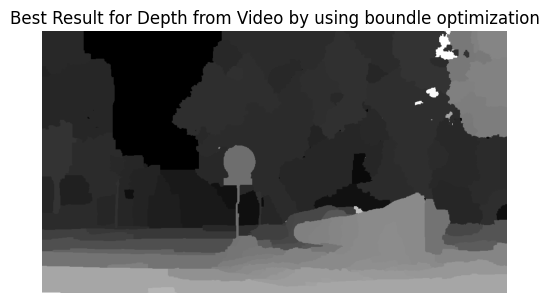

In [ ]:
print(D[0])
print(f'Boundle Optimization: choose_fram =={first} sequence ={frame_range}')
# first = 100
img_1 = img_ls[first]

# label cost
pairwise = (1 - np.eye(dis_range))

#horizontal and vertical neighbor cost
Hr = np.sum((img_1[:, 0:-1].astype(np.float) - img_1[:, 1:].astype(np.float))**2, axis=2)
Hr = 1.0/np.sqrt(Hr+epsilon)
Ver = np.sum((img_1[0:-1, :].astype(np.float) -img_1[1:, :].astype(np.float))**2, axis=2)
Ver = 1.0/np.sqrt(Ver+epsilon)

# meshgrid generation for whole image processing
X, Y = np.meshgrid(np.arange(W), np.arange(H))
loc_1 = np.vstack((X.ravel(), Y.ravel(), np.ones(N)))
pix_1 = np.array([img_1[Y.ravel(), X.ravel(), :]])
unary = np.zeros((N, dis_range))
   
for i, second in enumerate(frame_range):
    print(f"solving img{second}")
    img_2 = img_ls[second]
    K_2 = K[second]
    R_2 = R[second]
    T_2 = np.mat(T[second]).T
    pc = np.zeros((N, dis_range))
    pv = np.zeros((N, dis_range))
    for dis in range(dis_range):
        loc_2 = np.dot(np.dot(np.dot(np.dot(K_2, R_2.T), R_1), np.linalg.inv(K_1)), loc_1) + np.dot(np.dot(K_2, R_2.T), (T_1 - T_2))* disparity[dis]
        loc_2 = np.round(loc_2 / loc_2[2, :])
        # print('loc2',loc_2.shape)
        loc_2 = np.array(loc_2, dtype=np.int32)
        # boundary check
        loc_2[0, loc_2[0, :] < 0] = 0
        loc_2[1, loc_2[1, :] < 0] = 0
        loc_2[0, loc_2[0, :] >= W] = W - 1
        loc_2[1, loc_2[1, :] >= H] = H - 1

        pix_2 = np.array([img_2[loc_2[1, :], loc_2[0, :]]])
        # print('pix2',pix_2.shape)
        # sigma is the threshold for the data term
        pc[:, dis] = ((sigma / (sigma + np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))))
        depth_indices = D[i]
        depth_indices_projected = depth_indices[loc_2[1, :], loc_2[0, :]]
        dis_new = disparity[depth_indices_projected.astype(np.int32)]
        dis_new = np.mat(dis_new)
        loc_back = np.dot(np.dot(np.dot(np.dot(K_1, R_1.T), R_2), np.linalg.inv(K_2)), loc_1) + np.dot(np.dot(np.dot(K_1, R_1.T), (T_2 - T_1)), dis_new)
        loc_back = np.round(loc_back / loc_back[2, :])
        
        loc_back = np.array(loc_back, dtype=np.int32)
        loc_back[0, loc_back[0, :] < 0] = 0
        loc_back[1, loc_back[1, :] < 0] = 0
        loc_back[0, loc_back[0, :] >= W] = W - 1
        loc_back[1, loc_back[1, :] >= H] = H - 1
        
        color_dis = np.sum(np.square(loc_1 - loc_back), axis=0,keepdims=False)
        # print('pv',color_dis.shape,color_dis)
        # print('pc',np.sqrt(np.sum((pix_1 - pix_2) ** 2, axis=2)))
        pv[:, dis] = np.exp(color_dis / (2 *47 * 47))
    print('pc',pc)
    print('pv',pv)

    unary += np.multiply(pc,pv)
    # print('pc',pc)
    # print('unary',unary)

final_unary = 1 - (unary / np.max(unary))

final_unary = final_unary.reshape(H, W, dis_range)

# graphcut:lambda1 is the weight for the data term, lambda2 is the weight for the smooth term
init = pygco.cut_grid_graph(final_unary, lmbda*pairwise,  Ver, Hr, n_iter=-1, algorithm='expansion')
init = init.reshape(H, W)
print('get_depth_map................................')
plt.figure(num=1, dpi=100, figsize=(6,6))
plt.imshow(init,cmap='gray')
plt.title(f'Best Result for Depth from Video by using boundle optimization')
plt.axis("off")
plt.show()


**3. Show the best result and provide some discussion**

* **Discussion**
1. Here I used pygco.cut_grid_graph considering the horizontal and vertical link weights for optimization. To ensure the effectiveness of the algorithm, I introduce epsilon when calculating horizontal and vertical link costs. The significane of it is to stabilize the weight calculation and ensure that all pairs of pixels have some influence on the cost function, even if their pixel differences are extremely small.

2. Sigma and lambda control the weight of data term and smooth prior in the energy function, respectively. Here, I fixed the value of sigma and adjusted the value of lambda to explore the influence of a prior term on the result. According to the results shown above, it is obvious that when lambda grew, the depth map became more and more blur and finally achieved oversmooth. The best result is obtained when lambda=30.